# Statistics Journey Part 4 - Graphical Analysis of Data

# Exercise 1 
This dataset contain selected variables from European Social Survey for
2014.
- The variable ‘cgtsmke’ contains data on smoking behavior of individuals. Assign labels
to data on smoking behavior as follows: 1 “I smoke daily”, 2 ”I smoke but not every
day”, 3 “I don't smoke now but I used to”, 4 ”I have only smoked a few times, 5 “ I have
never smoked “
- Summarize the distribution of the smoking behavior of Europeans (for all countries)
using relevant charts.
- Compare the distribution of smoking behavior of Polish people and other European
nation (whichever you want) on one graph.
- The variable ‘fclcntr’ contains answers to the question “How close do you feel to your
country?”. Assign labels to this variable as follows: 1 “Very close”, 2 “Close”, 3 ”Not very close” 4 “Not close at all”.
- Prepare a graph describing the variation across European countries in their attachment
to the home country.
- Plot the distribution of age (agea) for Poland and Germany. Use both histogram and
density plots. Compare the distributions of the Polish and German populations by age –
is there any noticeable pattern?
- Summarize the distribution of the education level measured by the years of completed
education (edulvlb) by country. In which European country study the longest?

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

/var/folders/1m/mckmrfpx3yn1g1wj1m8cxm000000gn/T/ipykernel_61873/1099235115.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
smoke = pd.read_csv("ESS_data.csv")
smoke.head(5)

,name,idno,cntry,tvtot,tvpol,polintr,vote,lrscale,stflife,happy,...,alcfreq,height,weight,gndr,agea,yrbrn,marsts,edulvlb,eduyrs,emplrel
0,ESS7e02_1,1,AT,4.0,1.0,2.0,1.0,4.0,10.0,7.0,...,2.0,188.0,90.0,1.0,51.0,1964.0,6.0,322.0,13.0,1.0
1,ESS7e02_1,2,AT,7.0,3.0,1.0,1.0,0.0,7.0,5.0,...,6.0,162.0,90.0,1.0,67.0,1948.0,4.0,113.0,8.0,1.0
2,ESS7e02_1,4,AT,3.0,1.0,2.0,1.0,7.0,8.0,9.0,...,3.0,176.0,84.0,1.0,32.0,1983.0,6.0,322.0,13.0,1.0
3,ESS7e02_1,6,AT,2.0,2.0,1.0,1.0,10.0,10.0,10.0,...,5.0,160.0,62.0,2.0,67.0,1948.0,NaN,322.0,11.0,1.0
4,ESS7e02_1,7,AT,7.0,5.0,2.0,1.0,5.0,7.0,8.0,...,2.0,186.0,102.0,1.0,66.0,1949.0,NaN,322.0,12.0,1.0


Assigning labels

In [3]:
dict_smoke = {1.0:"I smoke daily", 2.0:"I smoke but not every day", 
              3.0:"I don't smoke now but I used to", 4.0:"I have only smoked a few times", 
              5.0:"I have never smoked"}

Good approach to quickly assign the labels is to use map method

In [4]:
smoke["SmokingBehavior"] = smoke["cgtsmke"].map(dict_smoke)

<Axes: xlabel='SmokingBehavior', ylabel='count'>

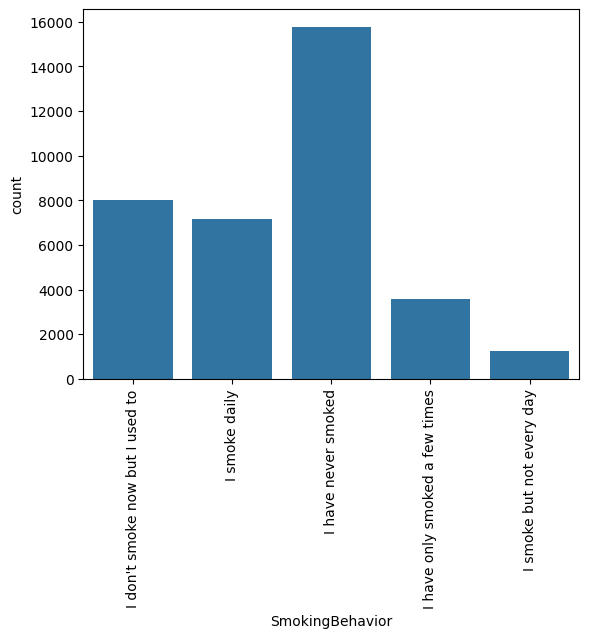

In [5]:
globalSmoking = sns.countplot(smoke, x = "SmokingBehavior")
plt.xticks(rotation = 90)
globalSmoking

In [6]:
smoke_2_country = smoke[smoke["cntry"].isin(["PL", "FR"])]

<Axes: xlabel='SmokingBehavior', ylabel='count'>

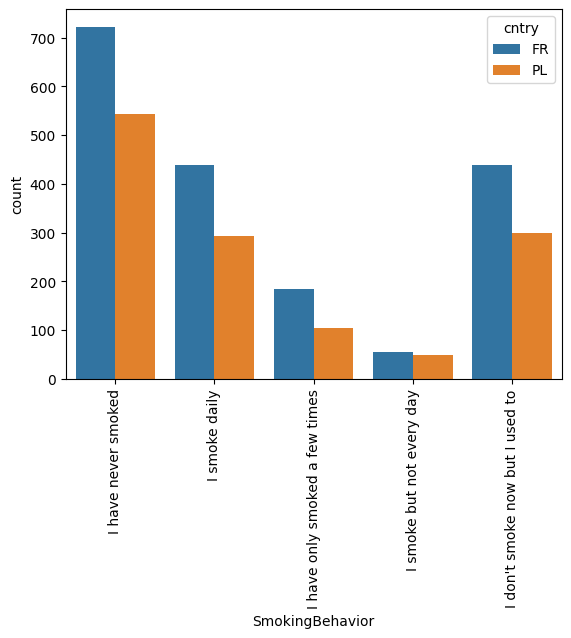

In [9]:
pl_vs_fr = sns.countplot(smoke_2_country, x = "SmokingBehavior", hue="cntry")
plt.xticks(rotation = 90)
pl_vs_fr

Assigning labels to column representing attachment to the country.
 1 “Very close”, 2 “Close”, 3 ”Not very close” 4 “Not close at all”.

In [10]:
feel_dict = {1.0: "Very close", 2.0: "Close", 3.0:"Not very close", 4.0:"Not close at all"}

smoke["attachment"] = smoke["fclcntr"].map(feel_dict)

- Plot the distribution of age (agea) for Poland and Germany. Use both histogram and
density plots. Compare the distributions of the Polish and German populations by age –
is there any noticeable pattern?
- Summarize the distribution of the education level measured by the years of completed
education (edulvlb) by country. In which European country study the longest?

<Axes: xlabel='agea', ylabel='Count'>

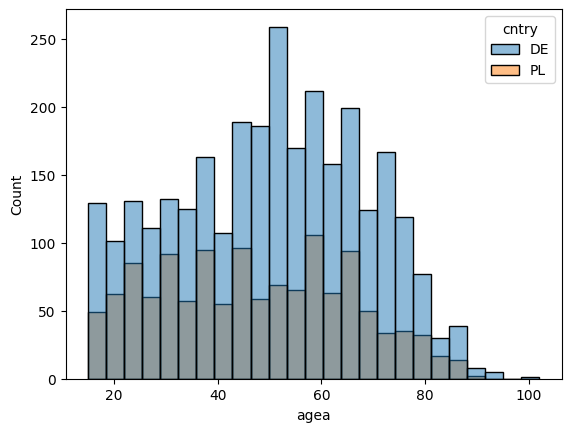

In [12]:
plde = smoke[smoke["cntry"].isin(["PL", "DE"])]
hist_pl_ge = sns.histplot(plde, x="agea", hue="cntry")
hist_pl_ge

<Axes: xlabel='agea', ylabel='Density'>

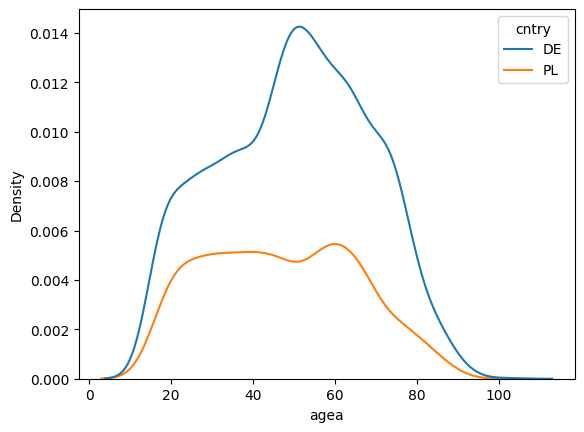

In [14]:
den_pl_de = sns.kdeplot(plde, x = "agea", hue="cntry")
den_pl_de

## Exercise 2:
Use ‘ess_data.csv’. Using graphical visualization of data answer the following questions:
 What is the proportion of Europeans that is at most 160 cm high (height variable)
 What is the proportion of Poles that feels “very close” to their country?
 What is the proportion of Portuguese that declares that they “have never smoked”?
 What is the proportion of men in the Czech Republic that weights more than 100kg?
What about women?

<Axes: xlabel='height', ylabel='Density'>

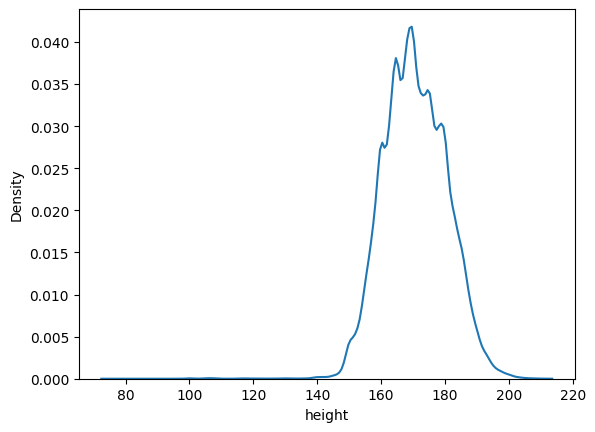

In [16]:
hgh = sns.kdeplot(smoke, x = "height")
hgh

<Axes: xlabel='attachment', ylabel='percent'>

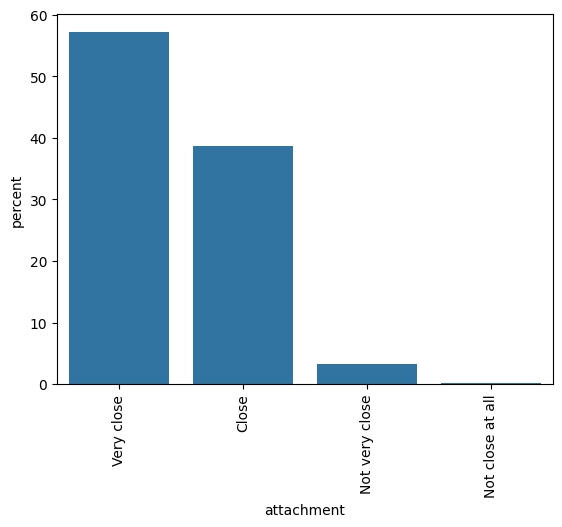

In [17]:
poland = smoke[smoke["cntry"].isin(["PL"])]
poland_pl = sns.countplot(poland, x = "attachment", stat="percent")
plt.xticks(rotation = 90)
poland_pl

<Axes: xlabel='SmokingBehavior', ylabel='percent'>

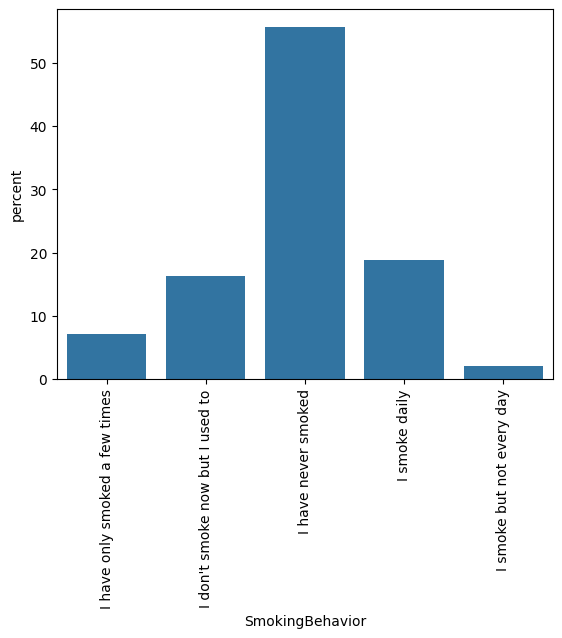

In [21]:
portugal = smoke[smoke["cntry"].isin(["PT"])]
portugal_pr = sns.countplot(portugal, x = "SmokingBehavior", stat="percent")
plt.xticks(rotation = 90)
portugal_pr

<Axes: xlabel='weight', ylabel='Probability'>

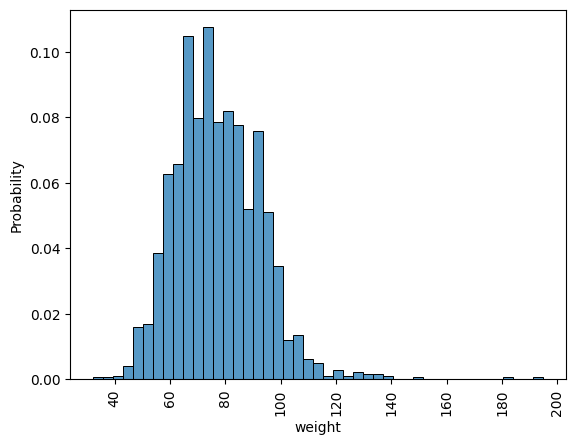

In [24]:
czech = smoke[smoke["cntry"].isin(["CZ"])]
czech_cz = sns.histplot(czech, x = "weight", stat="probability")
plt.xticks(rotation = 90)
czech_cz

## Exercise 3
Use ‘ess_data.csv’. Create the boxplot for weight (for all countries). Based on your graph
answer to the following questions:
 What are the range, the three quartiles and the interquartile range? Check your answers
with calculating the relevant quartiles
• About how many outliers can you identify in the data?

<Axes: xlabel='weight'>

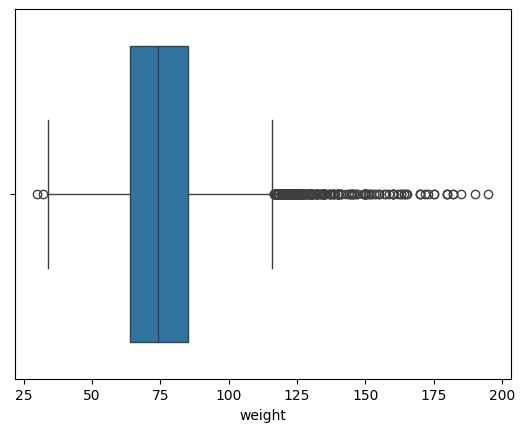

In [25]:
box_box = sns.boxplot(smoke, x="weight")
box_box